In [1]:
import numpy as np
x = np.random.randn(10, 15, 2)

In [3]:
x.shape

(10, 15, 2)

In [7]:
Wx = np.random.randn(2, 5)
Wx.shape

(2, 5)

In [6]:
res = np.dot(x, Wx)
res.shape

(10, 15, 5)

In [8]:
x

array([[[-1.48135376e+00,  8.90160940e-02],
        [ 4.93647091e-01,  1.67745394e+00],
        [ 6.55700395e-01, -6.98219375e-01],
        [-1.92092137e-01,  2.32354200e-01],
        [ 9.80914866e-02,  1.64164426e+00],
        [-9.58109264e-01, -1.91406293e-01],
        [-1.20248183e+00,  3.63440898e-01],
        [-1.50929994e+00, -1.35445590e-02],
        [ 1.90085709e+00,  1.34103058e+00],
        [-5.12589131e-01, -7.39692790e-02],
        [ 1.44074764e-02,  6.40624397e-01],
        [-4.20432563e-01,  4.76984416e-01],
        [ 1.94158616e+00,  4.01681421e-01],
        [ 4.88638293e-01,  9.30601977e-01],
        [ 9.05745365e-01, -6.37821511e-01]],

       [[ 1.71651706e-01,  1.01921007e+00],
        [ 5.11352889e-01, -9.29538257e-02],
        [ 3.31871664e-01, -1.50428491e+00],
        [ 1.14550066e+00, -1.20226549e+00],
        [-2.19506186e+00,  1.50296413e+00],
        [ 3.48118719e-01, -1.31768439e+00],
        [-5.02273070e-01,  1.11685571e+00],
        [ 2.07888824e-01,  1.2

corpus size: 1000, vocabulary size: 418
| epoch 1 | perplexity 394.10
| epoch 2 | perplexity 267.48
| epoch 3 | perplexity 226.15
| epoch 4 | perplexity 216.73
| epoch 5 | perplexity 206.70
| epoch 6 | perplexity 203.41
| epoch 7 | perplexity 199.22
| epoch 8 | perplexity 196.37
| epoch 9 | perplexity 191.63
| epoch 10 | perplexity 193.07
| epoch 11 | perplexity 190.25
| epoch 12 | perplexity 192.78
| epoch 13 | perplexity 190.74
| epoch 14 | perplexity 191.66
| epoch 15 | perplexity 190.84
| epoch 16 | perplexity 187.32
| epoch 17 | perplexity 185.26
| epoch 18 | perplexity 182.68
| epoch 19 | perplexity 184.03
| epoch 20 | perplexity 184.54
| epoch 21 | perplexity 182.44
| epoch 22 | perplexity 178.46
| epoch 23 | perplexity 176.71
| epoch 24 | perplexity 178.13
| epoch 25 | perplexity 176.12
| epoch 26 | perplexity 174.66
| epoch 27 | perplexity 170.37
| epoch 28 | perplexity 171.02
| epoch 29 | perplexity 168.31
| epoch 30 | perplexity 161.74
| epoch 31 | perplexity 164.27
| epoch 

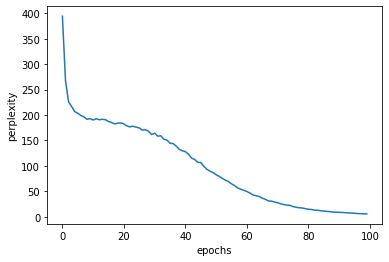

In [11]:
# coding: utf-8
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# ハイパーパラメータの設定
batch_size = 10
wordvec_size = 100
hidden_size = 100
time_size = 5  # Truncated BPTTの展開する時間サイズ
lr = 0.1
max_epoch = 100

# 学習データの読み込み（データセットを小さくする）
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 入力
ts = corpus[1:]  # 出力（教師ラベル）
data_size = len(xs)
print('corpus size: %d, vocabulary size: %d' % (corpus_size, vocab_size))

# 学習時に使用する変数
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# モデルの生成
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# ミニバッチの各サンプルの読み込み開始位置を計算
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # ミニバッチの取得
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # エポックごとにパープレキシティの評価
    ppl = np.exp(total_loss / loss_count)
    print('| epoch %d | perplexity %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# グラフの描画
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


In [12]:
xs[0:100]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 27, 24, 39, 26, 40, 41, 42, 26, 43, 32, 44, 45,
       46, 24, 47, 26, 27, 28, 29, 48, 49, 41, 42, 50, 51, 52, 53, 54, 55,
       35, 36, 37, 42, 56, 57, 58, 59, 24, 35, 60, 42, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70, 35, 71, 72, 42, 73, 74, 75, 35, 46, 42])

In [13]:
ts[0:100]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 27, 24, 39, 26, 40, 41, 42, 26, 43, 32, 44, 45, 46,
       24, 47, 26, 27, 28, 29, 48, 49, 41, 42, 50, 51, 52, 53, 54, 55, 35,
       36, 37, 42, 56, 57, 58, 59, 24, 35, 60, 42, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 35, 71, 72, 42, 73, 74, 75, 35, 46, 42, 76])

In [14]:
data_size

999

In [15]:
offsets

[0, 99, 198, 297, 396, 495, 594, 693, 792, 891]

In [16]:
test = np.empty((batch_size,10))
for t in range(10):
    for i, offset in enumerate(offsets):
        test[i,t] = (offset + time_idx) % data_size
    time_idx += 1


In [17]:
test[:,:]

array([[509., 510., 511., 512., 513., 514., 515., 516., 517., 518.],
       [608., 609., 610., 611., 612., 613., 614., 615., 616., 617.],
       [707., 708., 709., 710., 711., 712., 713., 714., 715., 716.],
       [806., 807., 808., 809., 810., 811., 812., 813., 814., 815.],
       [905., 906., 907., 908., 909., 910., 911., 912., 913., 914.],
       [  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.],
       [104., 105., 106., 107., 108., 109., 110., 111., 112., 113.],
       [203., 204., 205., 206., 207., 208., 209., 210., 211., 212.],
       [302., 303., 304., 305., 306., 307., 308., 309., 310., 311.],
       [401., 402., 403., 404., 405., 406., 407., 408., 409., 410.]])